#### 모듈 불러오기

In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
%matplotlib inline
from matplotlib import cm 

# 한글 폰트
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

pd.set_option('max_columns', 100, 'max_rows', 20)

In [15]:
# 필요한 데이터 불러오기
college_commercial = pd.read_csv('./Data/대학인근상권.csv')
store_inf = pd.read_csv('./Data/서울시 우리마을가게 상권분석서비스(상권점포-통합).csv', low_memory=False)

year_month = []
for i in range(store_inf.shape[0]):
    year_month.append(str(store_inf['기준_년_코드'].iloc[i]) + '-' + str(store_inf['기준_분기_코드'].iloc[i]))

store_inf['년-분기'] = year_month

# 대학 상권 뽑기
college_cm_name = list(college_commercial['TRDAR_CD_N'].unique())

In [32]:
# 상권별 군집 결과
cluster_result = pd.read_csv('상권별_군집.csv')#, encoding = 'cp949')

## 1. 분기별 등장하는 상권의 개수가 다른 문제

[1] 상권 list 중 오탈자 문제:2021-


[2] 분기별 등장하는 상권의 개수 상이함: 2020-4분기

목록: 주로 도로명이 아니라 시가지형

- '홍제역_중심시가지형', '서울역_경제기반형', '암사_일반근린형', '수유1동_주거지지원형', '도봉2동_일반근린형', '송정동_일반근린형', '장안평_경제기반형', '천연충현동_일반근린형', '상도4동_일반근린형', '난곡난향동_주거지지원형', '홍릉 연구단지_경제기반형', '공항동_일반근린형', '구의역_중심시가지형', '불광2동_주거지지원형', '신월3동_주거지지원형', '사근동_일반근린형', '인수동_일반근린형', '성내2동_일반근린형', '사당4동_일반근린형', '가리봉동_일반근린형', '면목패션봉제진흥지구_중심시가지형', '창덕궁앞_중심시가지형', '성수_일반근린형', '세운상가_중심시가지형', '경복궁 서측(청운효자사직동)_일반근린형', '중화2동_주거지지원형', '북촌가회동_중심시가지형', '창3동_일반근린형', '창신숭인_일반근린형', '정동_중심시가지형', '해방촌_일반근린형', '영등포경인로_경제기반형', '응암3동_일반근린형', '독산우시장_중심시가지형', '창동상계_경제기반형', '장위동_일반근린형', '안암동 캠퍼스타운_중심시가지형', '서울역_일반근린형', '묵2동_일반근린형', '용산전자상가_경제기반형', '구로2동_주거지지원형', '신촌_일반근린형', '효창공원_중심시가지형', '목3동_일반근린형', '마장동_중심시가지형', '풍납토성_중심시가지형', '419사거리_중심시가지형', '청량리종합시장_중심시가지형'

In [19]:
# 각 분기별로 상권의 개수 (한 분기만 1544로 다름 : 2020-4분기)

print("---- 각 분기별 등장하는 상권의 개수 확인 ----")

display(store_inf.drop_duplicates(['년-분기','상권_코드_명']).groupby('년-분기')['상권_코드_명'].count())
display(store_inf.drop_duplicates(['년-분기','상권_코드_명']).groupby('년-분기')['상권_코드_명'].count().value_counts())

store_202101 = set(store_inf[store_inf['년-분기'] == "2021-1"].상권_코드_명.unique())
store_202004 = set(store_inf[store_inf['년-분기'] == "2020-4"].상권_코드_명.unique())

print("\n---- 2020-4분기에만 등장하는 상권 확인----")

print("2020-4분기만 등장하는 상권 list: {} \n".format(list(set(store_202101).difference(set(store_202004)))))
print("2020-4분기만 등장하는 상권 list: {} \n".format(list(set(store_202004).difference(set(store_202101)))))

---- 각 분기별 등장하는 상권의 개수 확인 ----


년-분기
2016-1    1496
2016-2    1496
2016-3    1496
2016-4    1496
2017-1    1496
          ... 
2020-2    1496
2020-3    1496
2020-4    1544
2021-1    1496
2021-2    1496
Name: 상권_코드_명, Length: 22, dtype: int64

1496    21
1544     1
Name: 상권_코드_명, dtype: int64


---- 2020-4분기에만 등장하는 상권 확인----
2020-4분기만 등장하는 상권 list: ['종로?청계 관광특구'] 

2020-4분기만 등장하는 상권 list: ['안암동 캠퍼스타운_중심시가지형', '청량리종합시장_중심시가지형', '홍제역_중심시가지형', '가리봉동_일반근린형', '신월3동_주거지지원형', '풍납토성_중심시가지형', '성수_일반근린형', '난곡난향동_주거지지원형', '장위동_일반근린형', '창동상계_경제기반형', '묵2동_일반근린형', '419사거리_중심시가지형', '창덕궁앞_중심시가지형', '경복궁 서측(청운효자사직동)_일반근린형', '창신숭인_일반근린형', '송정동_일반근린형', '구의역_중심시가지형', '응암3동_일반근린형', '해방촌_일반근린형', '목3동_일반근린형', '천연충현동_일반근린형', '면목패션봉제진흥지구_중심시가지형', '효창공원_중심시가지형', '종로·청계 관광특구', '세운상가_중심시가지형', '도봉2동_일반근린형', '수유1동_주거지지원형', '상도4동_일반근린형', '성내2동_일반근린형', '서울역_경제기반형', '신촌_일반근린형', '장안평_경제기반형', '마장동_중심시가지형', '암사_일반근린형', '용산전자상가_경제기반형', '북촌가회동_중심시가지형', '사근동_일반근린형', '불광2동_주거지지원형', '영등포경인로_경제기반형', '서울역_일반근린형', '중화2동_주거지지원형', '사당4동_일반근린형', '공항동_일반근린형', '정동_중심시가지형', '구로2동_주거지지원형', '창3동_일반근린형', '홍릉 연구단지_경제기반형', '독산우시장_중심시가지형', '인수동_일반근린형'] 



In [20]:
## 2021-1분기 오기입 상권코드명 변경
store_inf['상권_코드_명'] = store_inf['상권_코드_명'].agg(lambda x: '종로·청계 관광특구' if x =='종로?청계 관광특구' else x)

## 2020-4분기 이외의 분기별 등장하는 상권이 서로 일치하는 지 확인(그러면 2020-4분기 데이터만 제외)
find_yearmonth = list(store_inf['년-분기'].unique())[:-3] + list(store_inf['년-분기'].unique())[-2:]

for i in range(len(find_yearmonth) - 1):
    value_1 = set(store_inf[store_inf['년-분기'] == find_yearmonth[i]].상권_코드_명.unique())
    value_2 = set(store_inf[store_inf['년-분기'] == find_yearmonth[i+1]].상권_코드_명.unique())
    
    print("{} / ({} 대비) 등장하는 상권 list: {} \n".format(find_yearmonth[i], find_yearmonth[i+1] ,
                                                    list(set(value_1).difference(set(value_2)))))
    
    print("{} / ({} 대비) 등장하는 상권 list: {} \n".format(find_yearmonth[i+1], find_yearmonth[i] ,
                                                 list(set(value_2).difference(set(value_1)))))

2016-1 / (2016-2 대비) 등장하는 상권 list: [] 

2016-2 / (2016-1 대비) 등장하는 상권 list: [] 

2016-2 / (2016-3 대비) 등장하는 상권 list: [] 

2016-3 / (2016-2 대비) 등장하는 상권 list: [] 

2016-3 / (2016-4 대비) 등장하는 상권 list: [] 

2016-4 / (2016-3 대비) 등장하는 상권 list: [] 

2016-4 / (2017-1 대비) 등장하는 상권 list: [] 

2017-1 / (2016-4 대비) 등장하는 상권 list: [] 

2017-1 / (2017-2 대비) 등장하는 상권 list: [] 

2017-2 / (2017-1 대비) 등장하는 상권 list: [] 

2017-2 / (2017-3 대비) 등장하는 상권 list: [] 

2017-3 / (2017-2 대비) 등장하는 상권 list: [] 

2017-3 / (2017-4 대비) 등장하는 상권 list: [] 

2017-4 / (2017-3 대비) 등장하는 상권 list: [] 

2017-4 / (2018-1 대비) 등장하는 상권 list: [] 

2018-1 / (2017-4 대비) 등장하는 상권 list: [] 

2018-1 / (2018-2 대비) 등장하는 상권 list: [] 

2018-2 / (2018-1 대비) 등장하는 상권 list: [] 

2018-2 / (2018-3 대비) 등장하는 상권 list: [] 

2018-3 / (2018-2 대비) 등장하는 상권 list: [] 

2018-3 / (2018-4 대비) 등장하는 상권 list: [] 

2018-4 / (2018-3 대비) 등장하는 상권 list: [] 

2018-4 / (2019-1 대비) 등장하는 상권 list: [] 

2019-1 / (2018-4 대비) 등장하는 상권 list: [] 

2019-1 / (2019-2 대비) 등장하는 상권 list: [] 



##### 1의결론: 2020분기에 갑자기 등장한 도로명은 제거

In [21]:
store_point_list = list(store_inf[store_inf['년-분기'] == "2016-1"]['상권_코드_명'].unique())
store_inf = store_inf.query('상권_코드_명 in @ store_point_list')

print("---- 각 분기별 등장하는 상권의 개수 확인(전처리 후)----")

display(store_inf.drop_duplicates(['년-분기','상권_코드_명']).groupby('년-분기')['상권_코드_명'].count())
display(store_inf.drop_duplicates(['년-분기','상권_코드_명']).groupby('년-분기')['상권_코드_명'].count().value_counts())

store_202101 = set(store_inf[store_inf['년-분기'] == "2021-1"].상권_코드_명.unique())
store_202004 = set(store_inf[store_inf['년-분기'] == "2020-4"].상권_코드_명.unique())

---- 각 분기별 등장하는 상권의 개수 확인(전처리 후)----


년-분기
2016-1    1496
2016-2    1496
2016-3    1496
2016-4    1496
2017-1    1496
          ... 
2020-2    1496
2020-3    1496
2020-4    1496
2021-1    1496
2021-2    1496
Name: 상권_코드_명, Length: 22, dtype: int64

1496    22
Name: 상권_코드_명, dtype: int64

## 2.상권점포 데이터 확인해보기

In [22]:
# 데이터 확인해보기
store_cm_name = list(store_inf['상권_코드_명'].unique())

print("데이터 확인\n")
print("상권점포 데이터(서울 상권 분석 서비스)의 상권 개수: {}개".format(len(store_cm_name)))
print("추출한 대학 상권 개수: {}개".format(len(college_cm_name)))
print("대학 상권의 비율: {:.3f}%".format(len(college_cm_name) / len(store_cm_name)))

print("대학 상권에만 있는 상권 list: {} \n".format(list(set(college_cm_name).difference(set(store_cm_name)))))

데이터 확인

상권점포 데이터(서울 상권 분석 서비스)의 상권 개수: 1496개
추출한 대학 상권 개수: 317개
대학 상권의 비율: 0.212%
대학 상권에만 있는 상권 list: [] 



## 3. 개폐율 간의 시각화 작업


토의할 주요 issue

[1] 4분할 시각화 과정의 기준 값을 어떤 걸로 할지: (1) 서울시 전체 개/폐업률 (2) 대학상권 개/폐업률 (3) cluster 개/폐업률
 - 서울시 전체 vs 대학상권에는 큰 차이가 없음(전체 개/폐업률이 차이가 소수점 차이라 plot상 사분면의 영향도는 덜함

[2] 개폐업률 시 포함될 업종

[3] 계폐업률 계산시, 단순히 개업률이 mean을 때릴지, 아니면 분기별 전체 개업한 점포 수 / 점포수로 할지
(약간 차이가 존재, 개업률이 제대로 맞지 않음)

>> 추정매출의 경우 22분기 상권마다 모든 분기에 등장하는 업종만 뻈는데 과연 이방 식대로 개폐업률시에도 적용할지 

[우선 나의 입장]
- 우선 개/폐율의 경우는 2번으로 정의해서 하되 코드만 일부 바꾸면 해결할 수 있도록 코드 정리하기 
- 개/페업률 산출시 우선 데이터 상 모든 업종을 대상으로 진행

In [23]:
college_store_inf = store_inf.query('상권_코드_명 in @ college_cm_name')

display(college_store_inf.drop_duplicates(['년-분기','상권_코드_명']).groupby('년-분기')['상권_코드_명'].count().value_counts())

college_store_inf.head(10)

317    22
Name: 상권_코드_명, dtype: int64

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,년-분기
4,2016,1,D,발달상권,1001180,신촌역,CS100007,치킨전문점,3,6,17,1,0,0,3,2016-1
9,2016,1,A,골목상권,1000289,인촌로17가길,CS100008,분식전문점,6,6,33,2,17,1,0,2016-1
14,2016,1,D,발달상권,1001238,서울 동대문구 청량리역,CS300014,신발,32,32,3,1,0,0,0,2016-1
21,2016,1,A,골목상권,1000615,개봉로2길,CS200001,일반교습학원,17,18,11,2,6,1,1,2016-1
30,2016,1,D,발달상권,1001162,서울 광진구 건대입구역_1,CS100009,호프-간이주점,8,10,10,1,0,0,2,2016-1
32,2016,1,A,골목상권,1000847,고무래로8길,CS100009,호프-간이주점,7,7,0,0,0,0,0,2016-1
38,2016,1,A,골목상권,1000409,연서로3길,CS200021,기타오락장,1,1,100,1,100,1,0,2016-1
41,2016,1,A,골목상권,1000047,퇴계로56길,CS300002,편의점,1,2,0,0,0,0,1,2016-1
49,2016,1,A,골목상권,1000437,명지대길,CS100008,분식전문점,14,18,6,1,6,1,4,2016-1
51,2016,1,A,골목상권,1000112,송정4가길,CS300011,일반의류,8,8,13,1,13,1,0,2016-1


####  참고사항: 대학상권 분기별 개/폐업률 확인
- '서울상권의 (코로나 이후) 평균 개업률 : 2.357'
- '서울상권의 (코로나 이후) 평균 폐업률 : 2.643'

In [24]:
# 대학상권 분기별 개/폐업률 확인
college_store_cnt = college_store_inf.groupby('년-분기')['점포_수'].sum()           # 분기별 대학상권 점포수
college_openstore_cnt = college_store_inf.groupby('년-분기')['개업_점포_수'].sum()  # 분기별 대학상권 개업 점포 수
college_closestore_cnt = college_store_inf.groupby('년-분기')['폐업_점포_수'].sum() # 분기별 대학상권 폐업 점포 수

openstore_ratio_byquan = college_openstore_cnt / college_store_cnt * 100   # 분기별 대학상권 개업률
closestore_ratio_byquan = college_closestore_cnt / college_store_cnt  * 100 # 분기별 대학상권 폐업률

## 코로나 후 이후 비교를 위해 (2020-2분기 이후) 평균을 구함
open_point_aftercovid = np.round(openstore_ratio_byquan.iloc[-6:].mean(), 3)  
close_point_aftercovid = np.round(closestore_ratio_byquan.iloc[-6:].mean(), 3)

display('대학상권의 (코로나 이후) 평균 개업률 : {}'.format(open_point_aftercovid))
display('대학상권의 (코로나 이후) 평균 폐업률 : {}'.format(close_point_aftercovid))

'대학상권의 (코로나 이후) 평균 개업률 : 2.317'

'대학상권의 (코로나 이후) 평균 폐업률 : 2.826'

#### 3-1. 대학상권 점포 관련 EDA 
- 대학상권의 폐업 같은 경우는 계절성을 지님 [1분기 증가 > 2분기 하락 > 3분기 증가 > 4분기 하락]
- 대학 상권의 점포 수는 18년부터 점차 하락함(2020-1분기에 갑자기 급등하지만 다시 감소 추세)
- 개업률/폐업률도 사실상 비슷한 추세

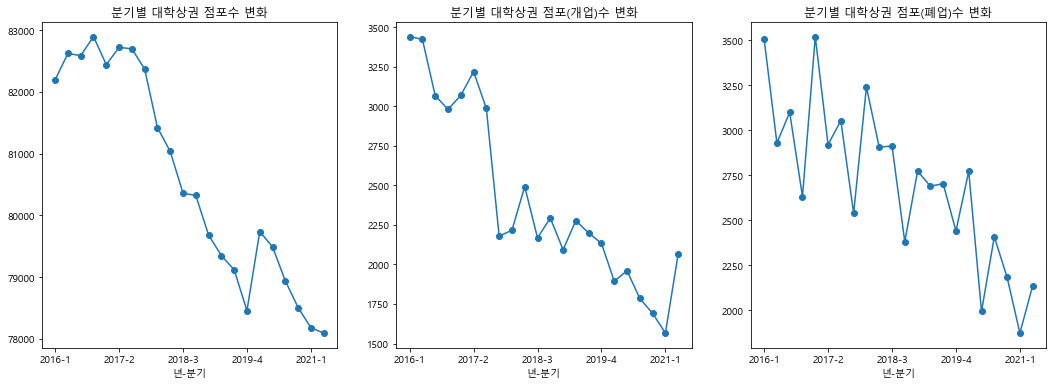

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))

college_store_cnt.plot(ax = ax[0], title = '분기별 대학상권 점포수 변화', marker ='o')
college_openstore_cnt.plot(ax = ax[1], title = '분기별 대학상권 점포(개업)수 변화', marker ='o')
college_closestore_cnt.plot(ax = ax[2], title = '분기별 대학상권 점포(폐업)수 변화', marker ='o')
plt.show()

In [26]:
#### 상권별 개/폐업률 계산 (점포수, 개업한 점포수 / 페업한 점포 수)

store_cnt_bycma = college_store_inf.pivot_table(index = '상권_코드_명', columns = '년-분기', values = '점포_수', \
                                                aggfunc = 'sum',fill_value = 0)

openstore_cnt_bycma = college_store_inf.pivot_table(index = '상권_코드_명', columns = '년-분기', values = '개업_점포_수', 
                                                    aggfunc = 'sum',fill_value = 0)

closestore_cnt_bycma = college_store_inf.pivot_table(index = '상권_코드_명', columns = '년-분기', values = '폐업_점포_수', \
                                                     aggfunc = 'sum',fill_value = 0)

openstore_ratio_bycma = openstore_cnt_bycma.div(store_cnt_bycma) * 100
closestore_ratio_bycma = closestore_cnt_bycma.div(store_cnt_bycma) * 100

#### 상권별 코로나 이후 평균 개/폐업률
openratio_bycma_aftercovid = np.round(openstore_ratio_bycma.iloc[:, -5:].mean(axis = 1),3)
closeratio_bycma_aftercovid = np.round(closestore_ratio_bycma.iloc[:, -5:].mean(axis = 1),3)

display('상권별 코로니 이후 개업률')
display(openratio_bycma_aftercovid)

display('상권별 코로니 이후 폐업률')
display(closeratio_bycma_aftercovid)

'상권별 코로니 이후 개업률'

상권_코드_명
가재울로6길     3.296
가좌로7길      3.056
갈현로1길      3.365
갈현로7길      4.552
강남시장_동작    2.288
           ...  
휘경로2길      2.255
휘경로3길      0.682
흑석로13길     3.361
흑석로9길      2.594
흑석시장       1.990
Length: 317, dtype: float64

'상권별 코로니 이후 폐업률'

상권_코드_명
가재울로6길     2.631
가좌로7길      2.747
갈현로1길      2.786
갈현로7길      2.209
강남시장_동작    5.686
           ...  
휘경로2길      2.894
휘경로3길      2.694
흑석로13길     2.805
흑석로9길      4.032
흑석시장       2.827
Length: 317, dtype: float64

In [47]:
#### 상권별 개/폐업률(코로나 이후) - 상권의 평균 개/페업률(코로나 이후)
open_ratio = openratio_bycma_aftercovid - open_point_aftercovid
close_ratio = closeratio_bycma_aftercovid - close_point_aftercovid

value = pd.DataFrame({'개업률(%)' : open_ratio , '폐업률(%)' : close_ratio})

### segmentation 결과 합치기
value = pd.merge(value.reset_index(), cluster_result, on = '상권_코드_명', how ='inner')
value = value.set_index('상권_코드_명')
value = value[['개업률(%)','폐업률(%)','segment']].reset_index()
display(value.head())

,상권_코드_명,개업률(%),폐업률(%),segment
0,가재울로6길,0.979,-0.195,3
1,가좌로7길,0.739,-0.079,2
2,갈현로1길,1.048,-0.040,8
3,갈현로7길,2.235,-0.617,3
4,강남시장_동작,-0.029,2.860,9


In [48]:
groups = value.groupby('segment')

In [59]:
value.query('segment == 10')

,상권_코드_명,개업률(%),폐업률(%),segment
18,경인로35길,1.367,-0.089,10
27,고척근린시장,-0.345,-1.619,10
195,아현시장,-0.322,-1.422,10
213,왕십리로14길,1.782,0.036,10
260,증가로23나길,0.755,0.676,10
283,퇴계로18길,-1.193,-1.555,10


#### 참고사이트: https://yganalyst.github.io/etc/visual_1/

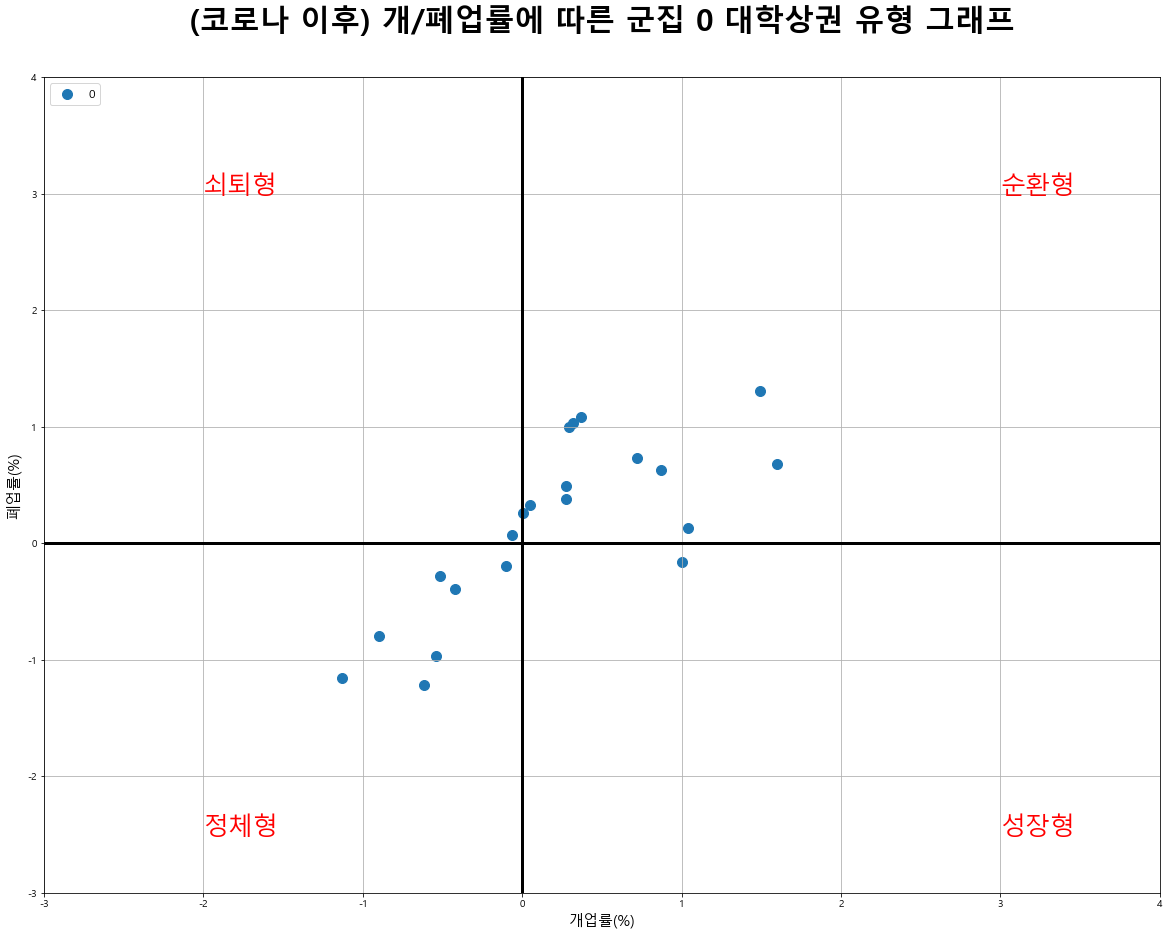

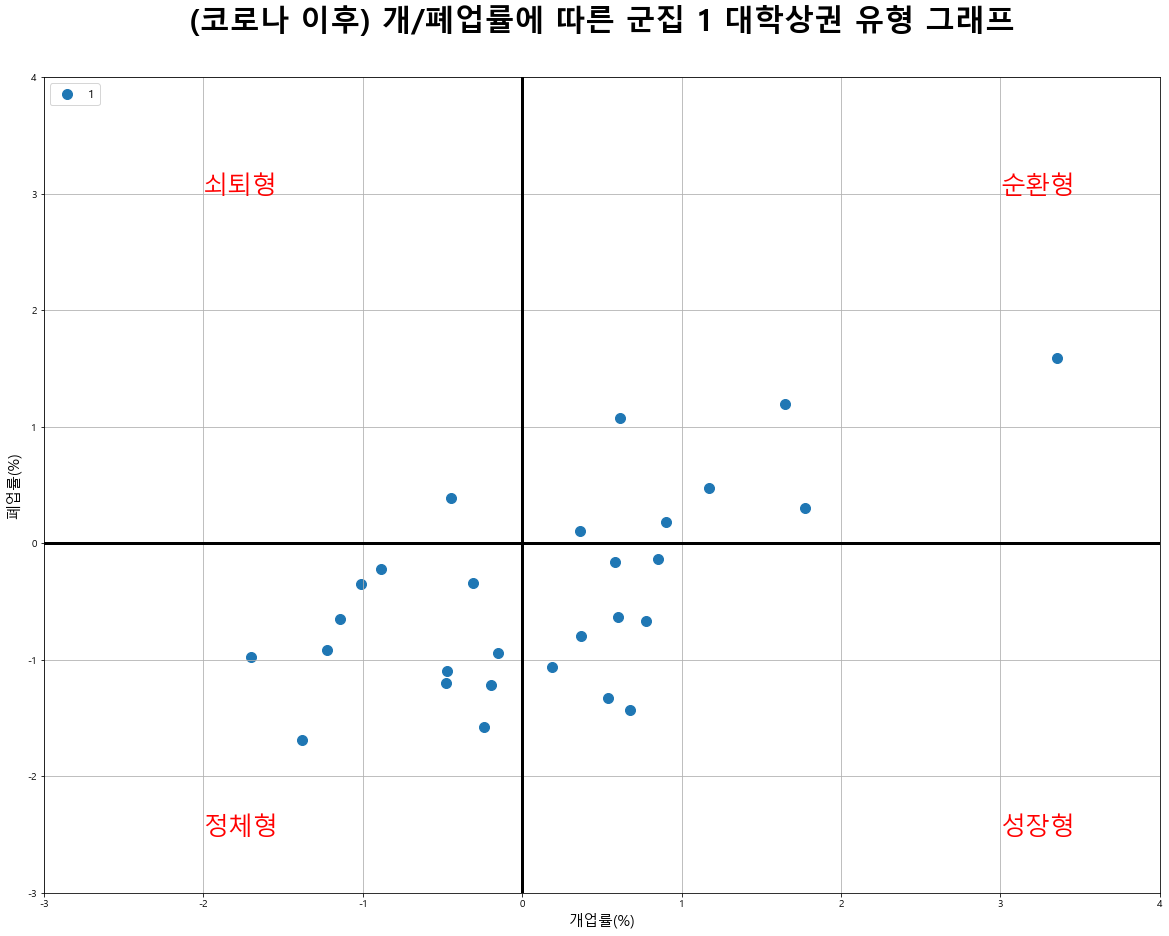

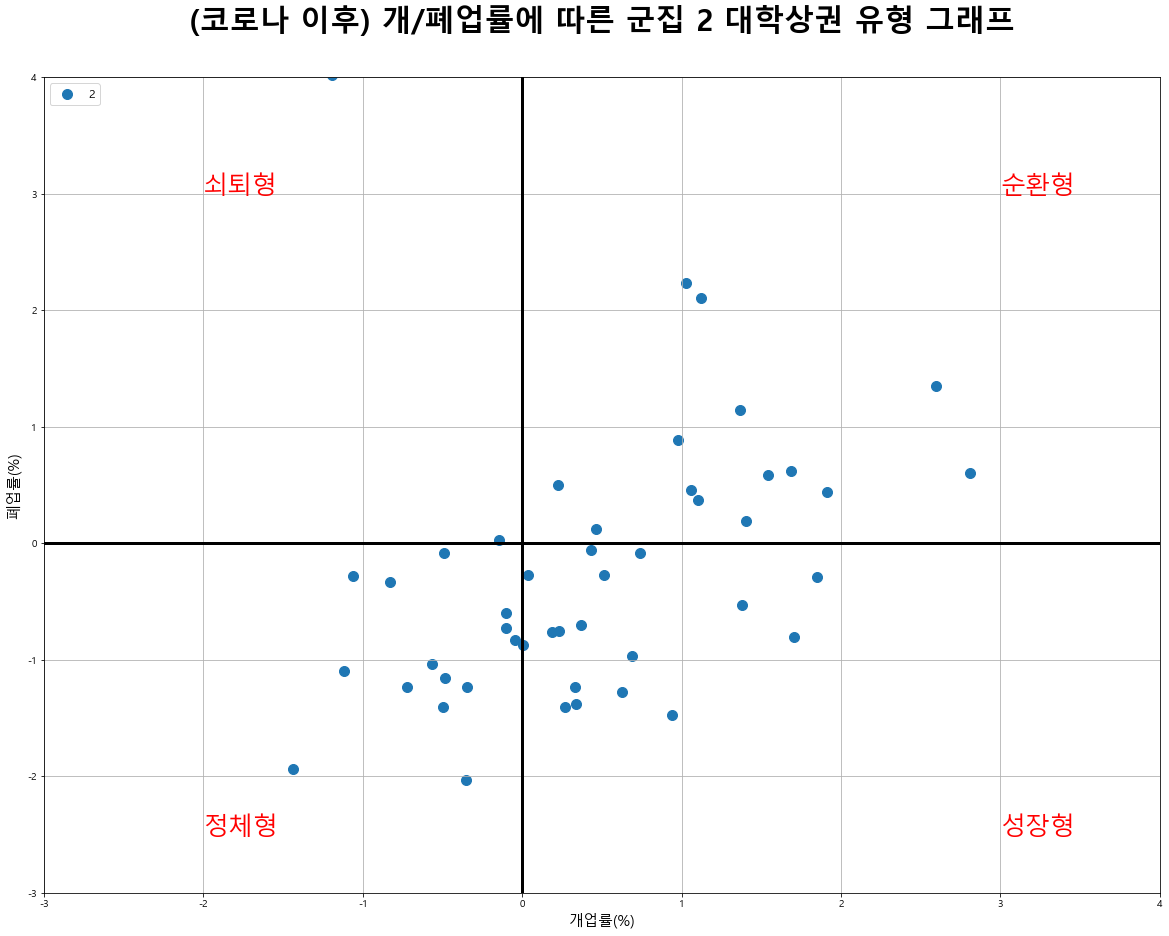

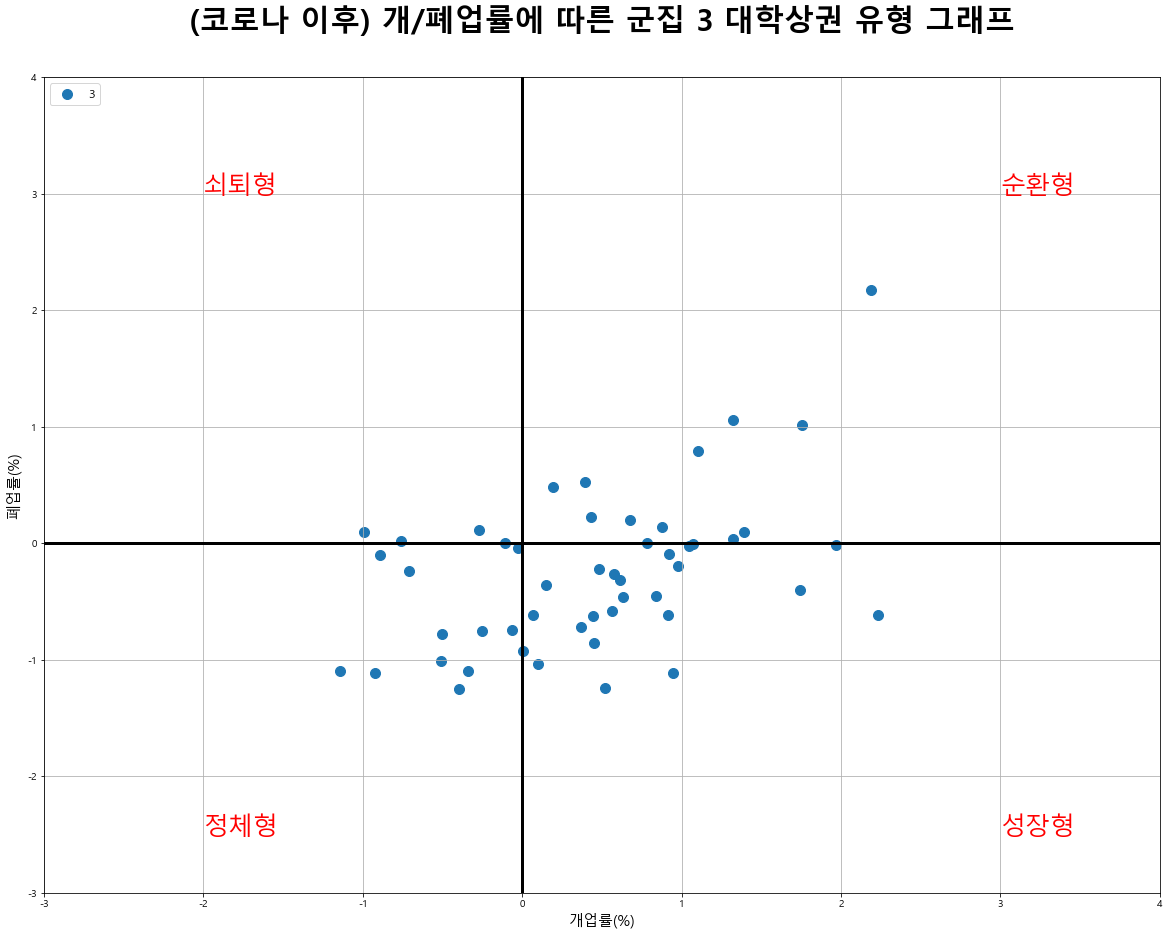

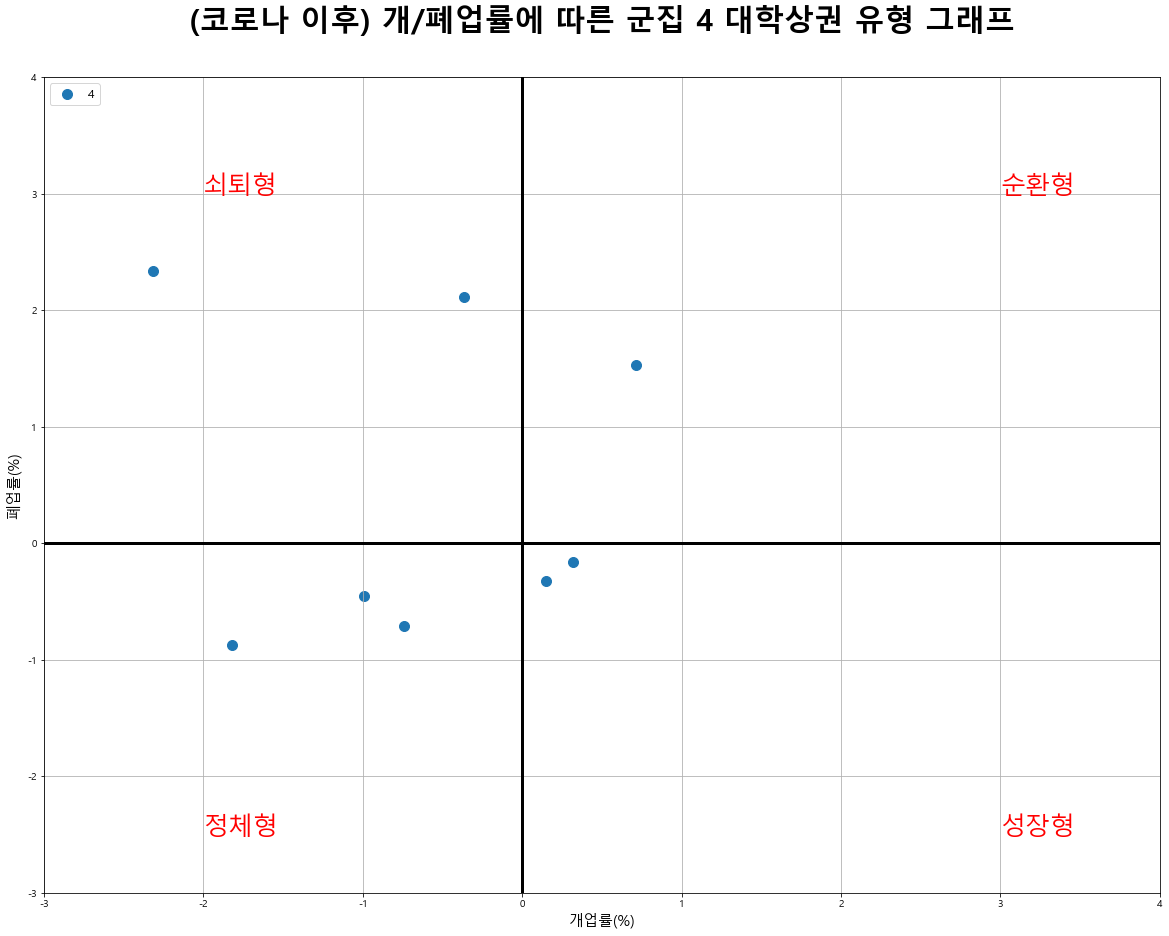

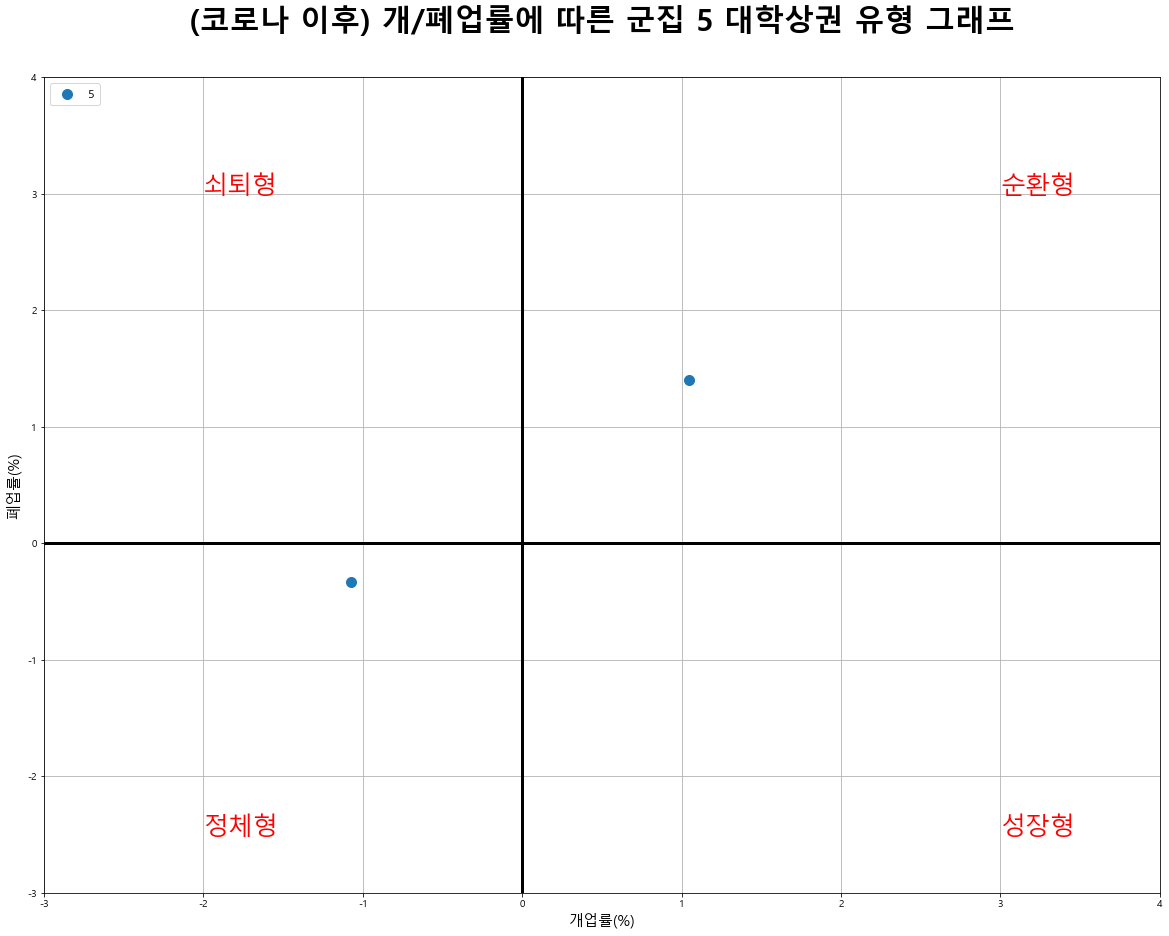

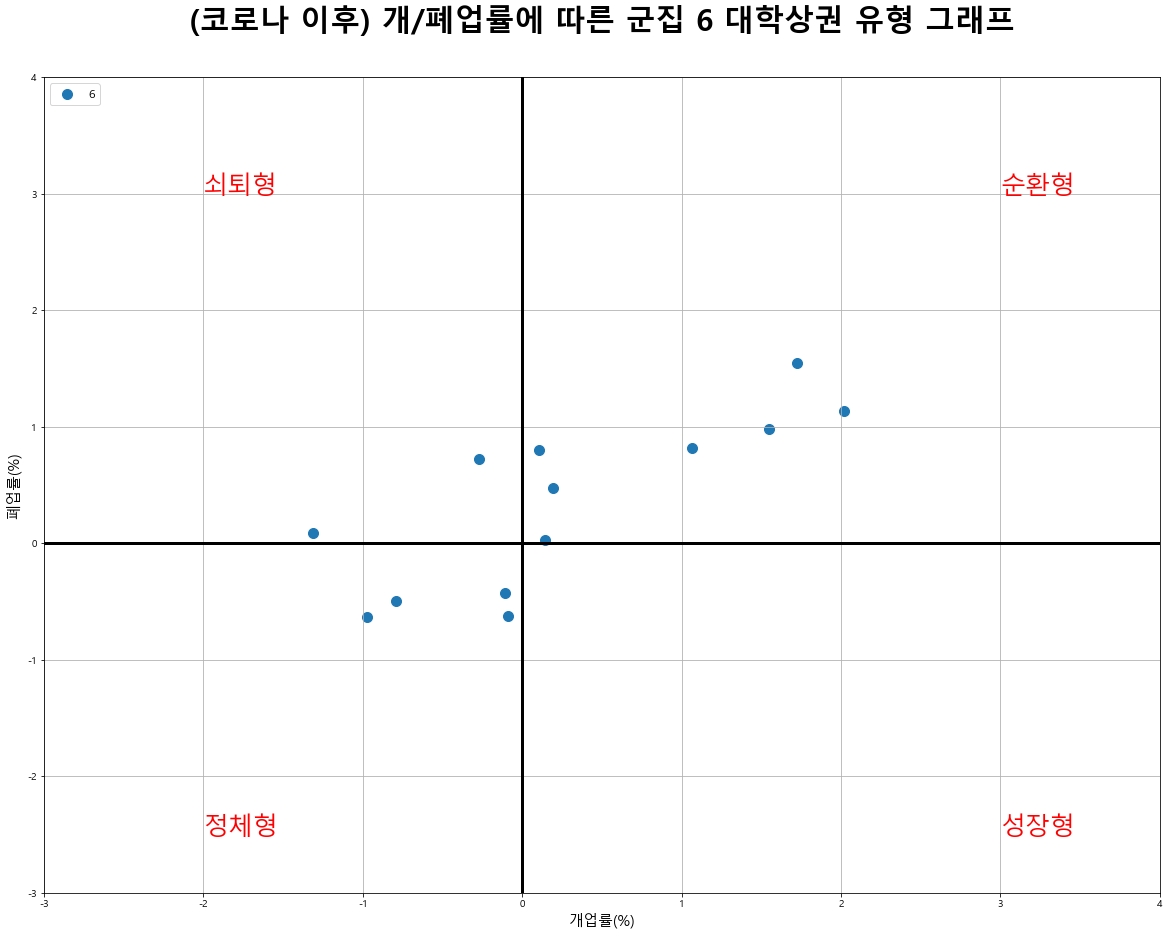

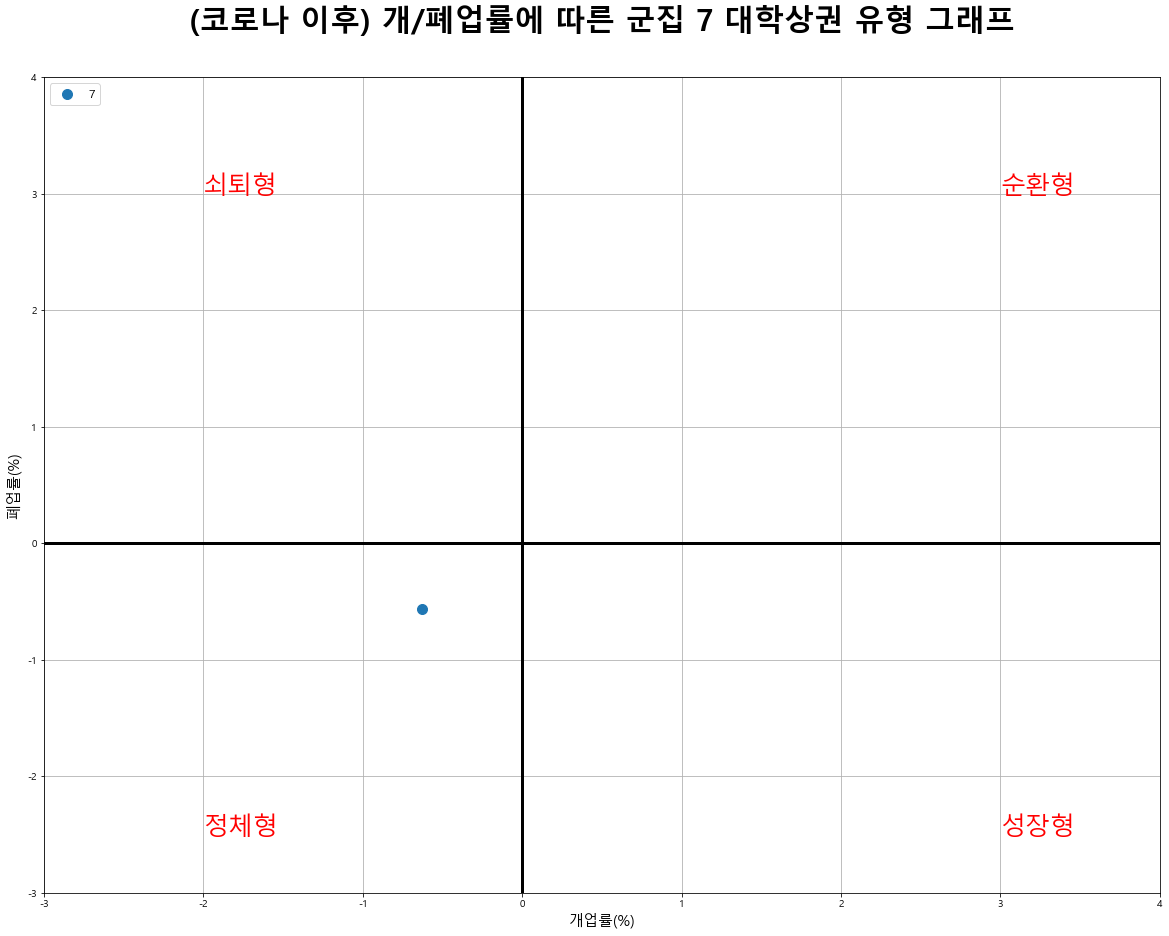

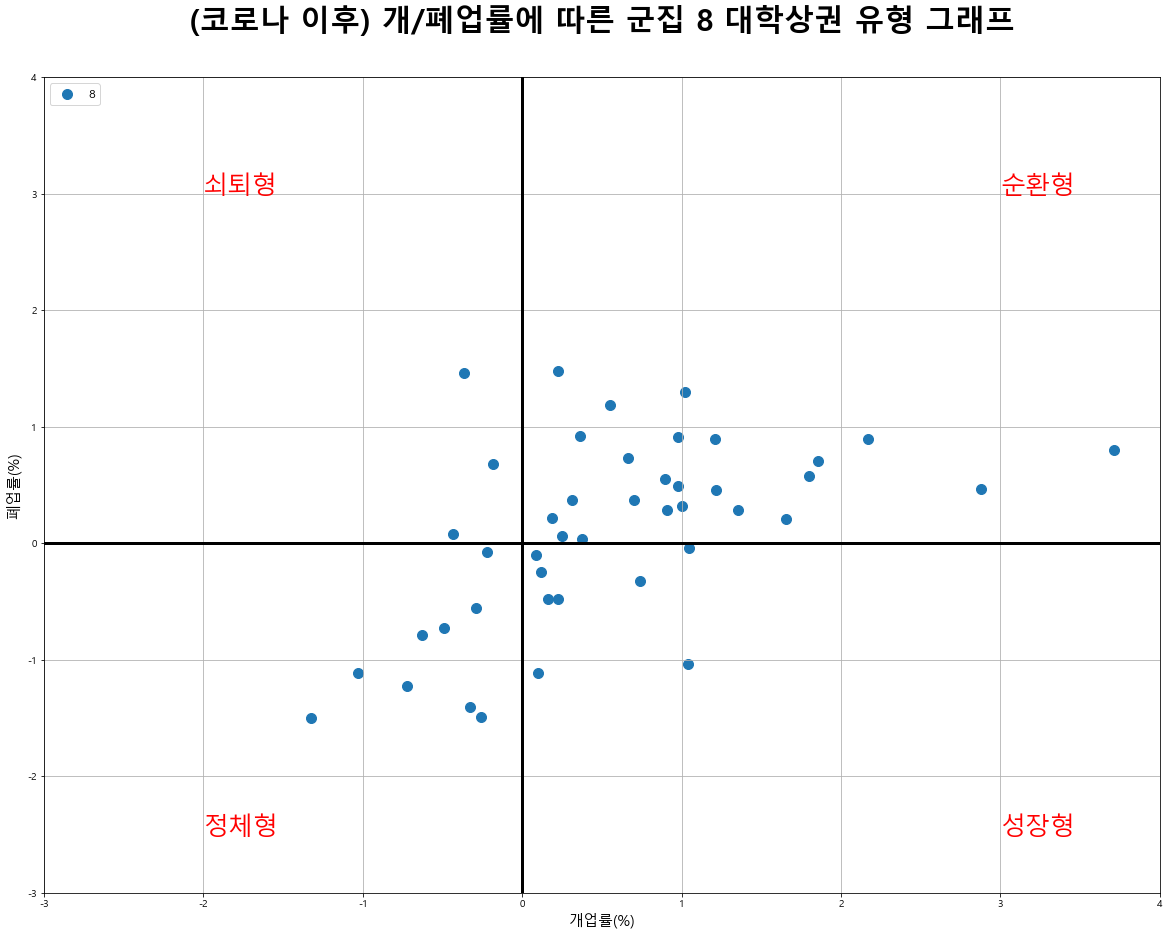

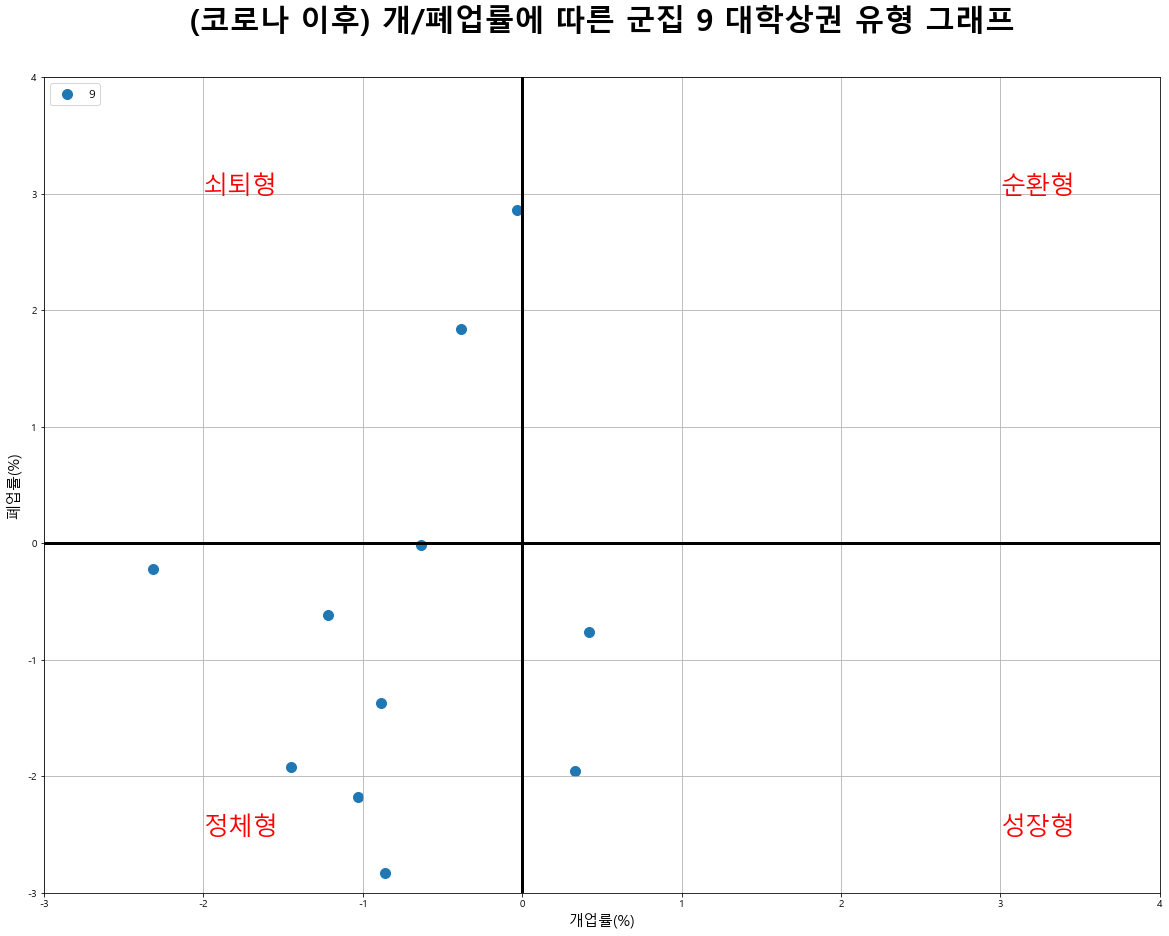

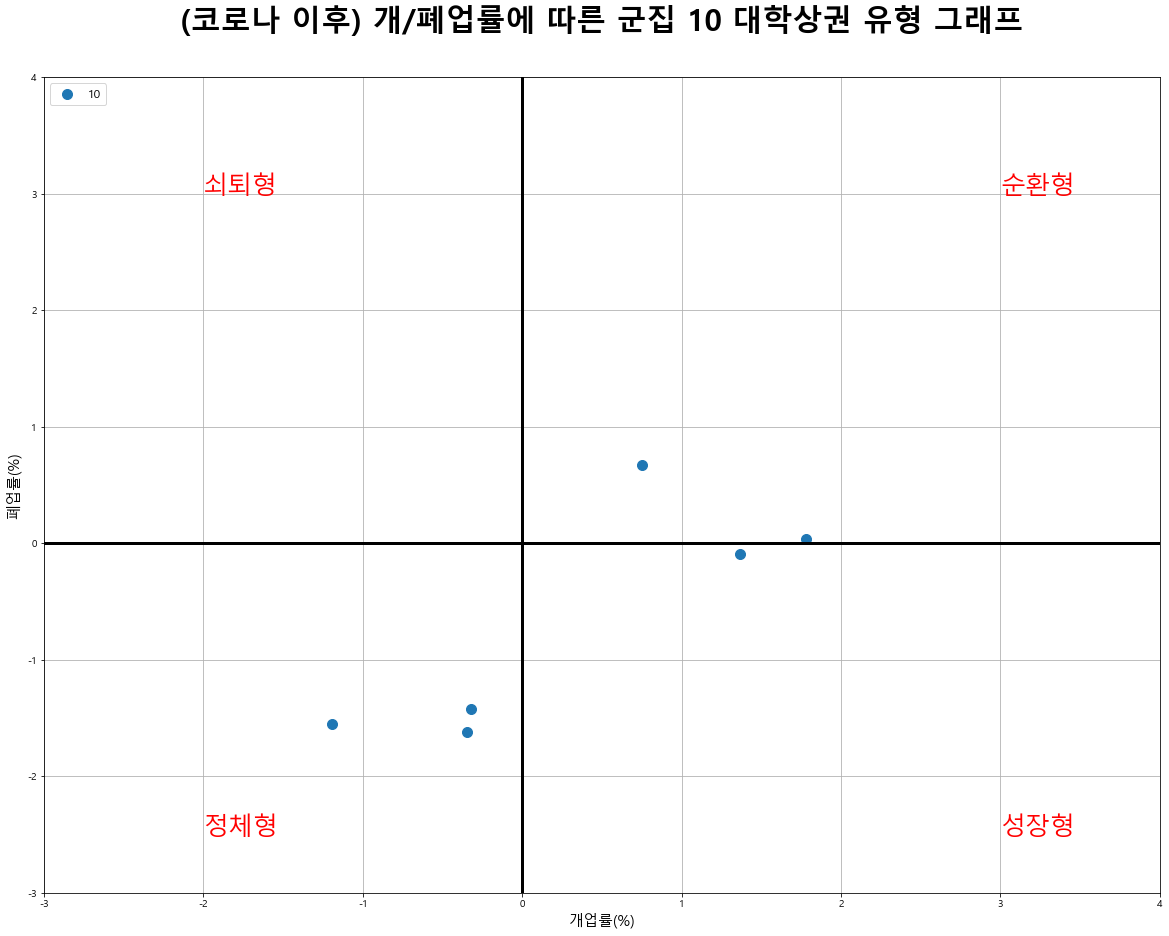

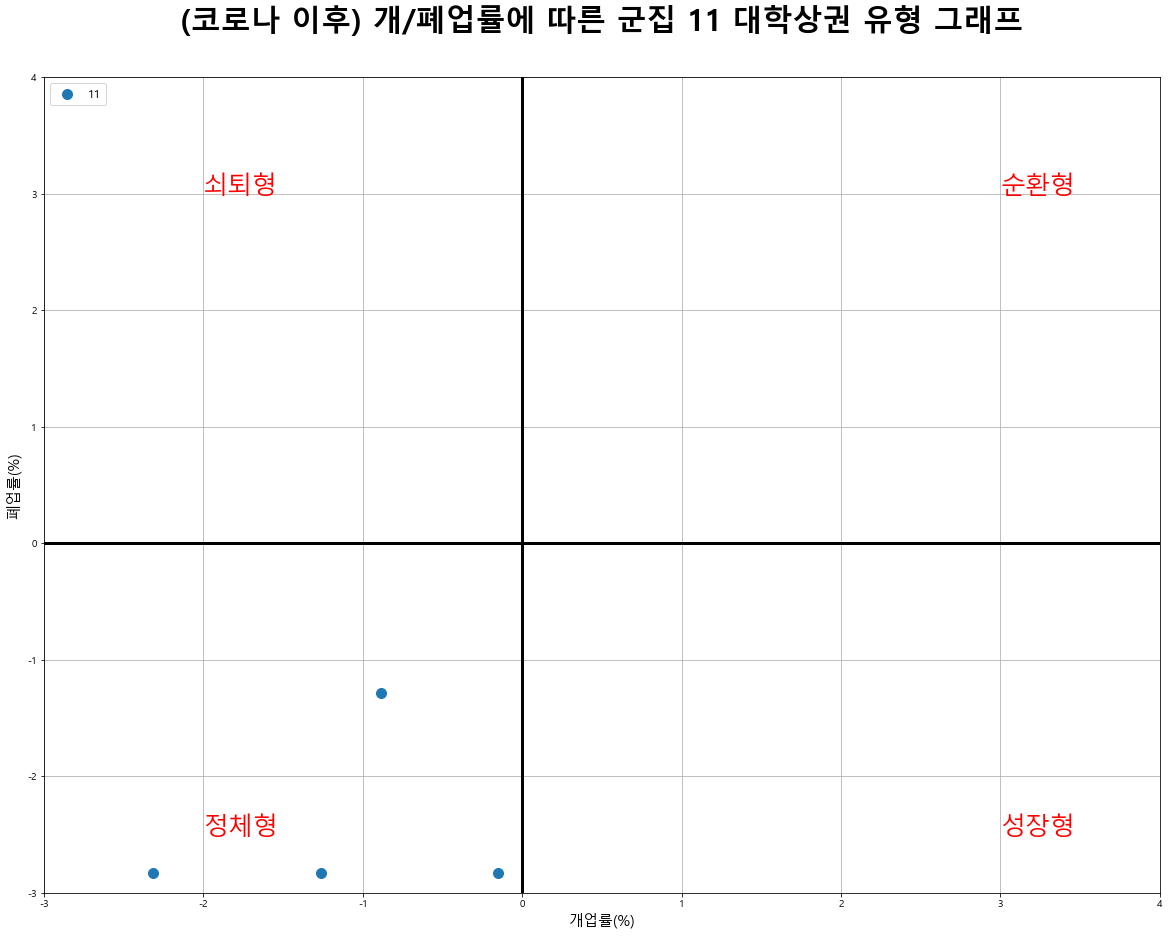

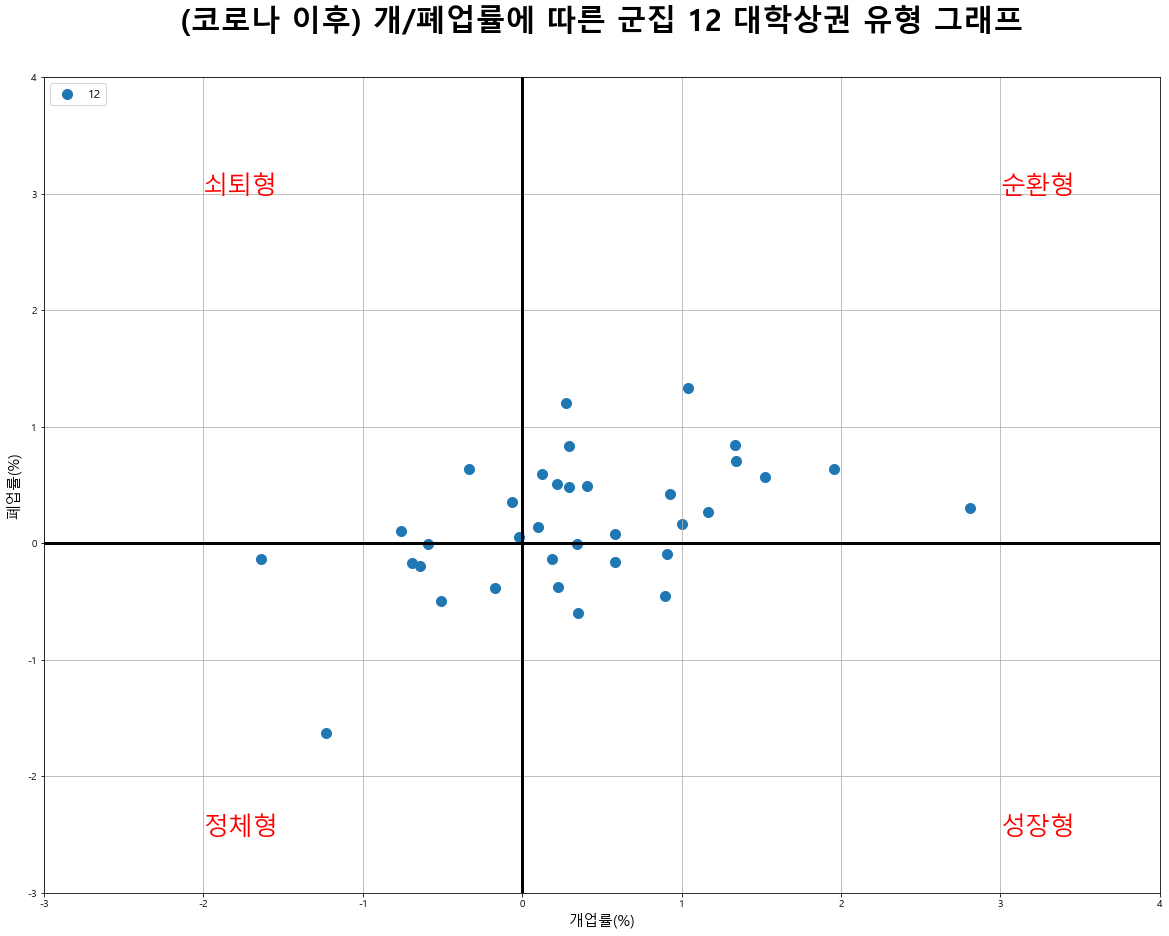

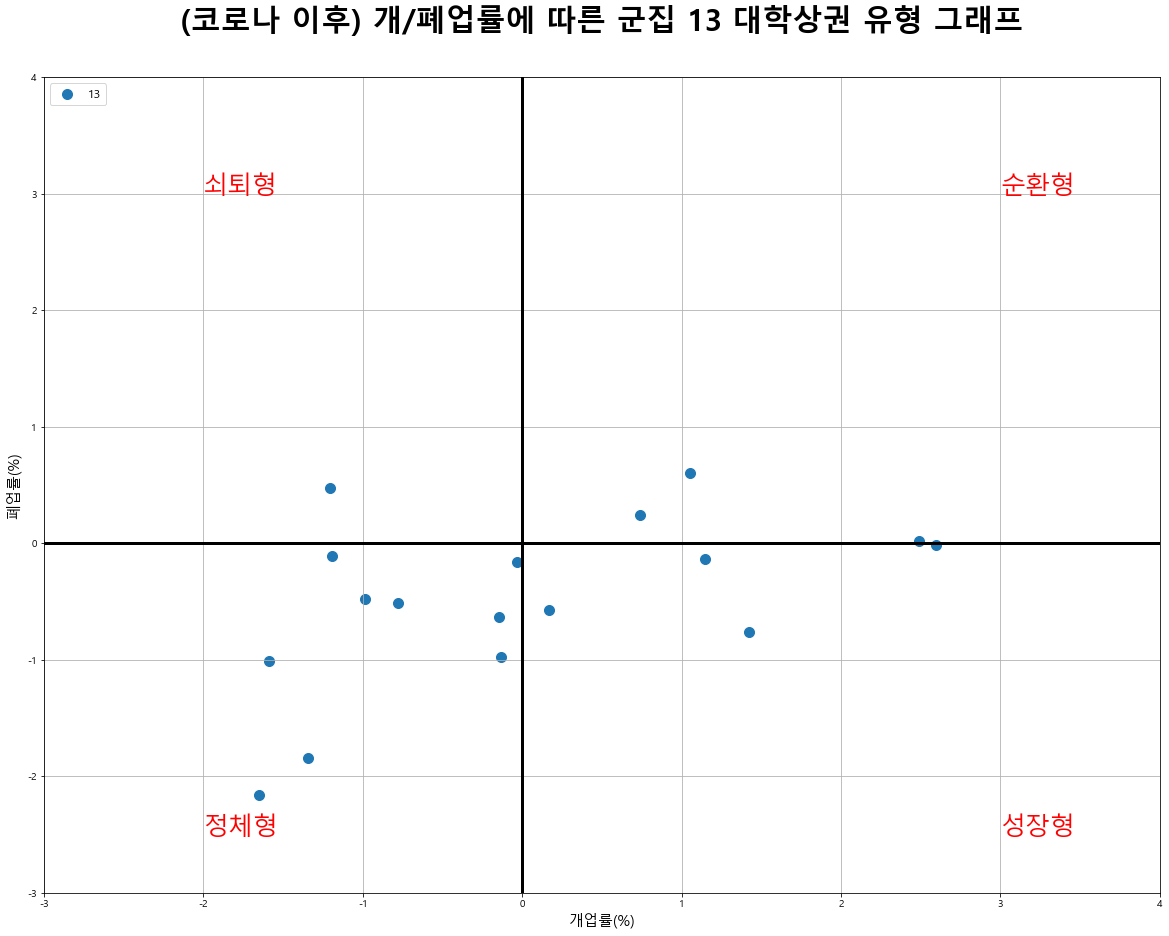

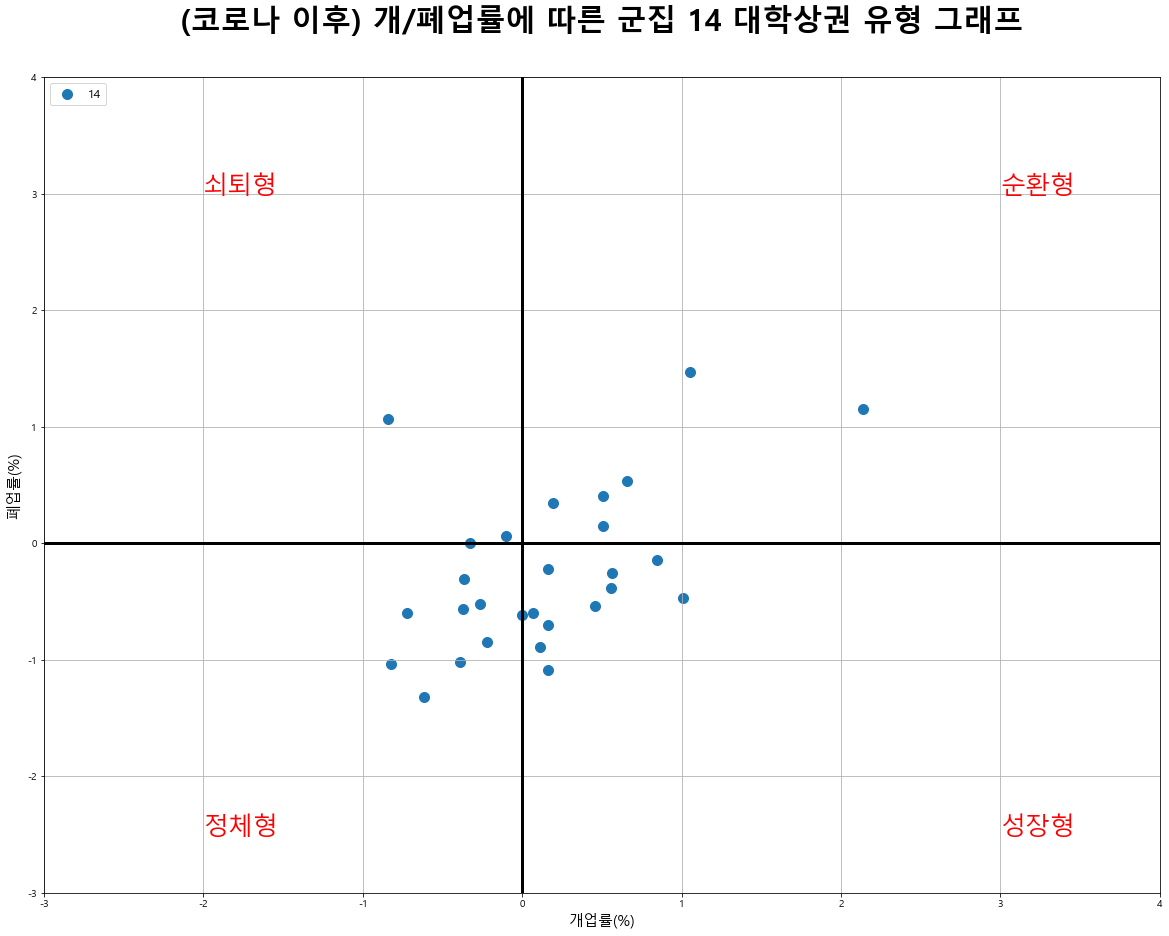

In [55]:
groups = value.groupby('segment')

for i, (name, group) in enumerate(groups):
    fig, ax = plt.subplots(figsize =(20,15))
    
    ax.scatter(group["개업률(%)"], group["폐업률(%)"], cmap='coolwarm', s = 100, label = name)

    ax.set_title("(코로나 이후) 개/폐업률에 따른 군집 {} 대학상권 유형 그래프".format(name), 
                 fontdict= {'fontsize': 30, 'fontweight':'bold'} , y=1.05)
    ax.set_xlabel("개업률(%)", fontsize=15)
    ax.set_ylabel("폐업률(%)", fontsize=15)
    ax.grid()
    
    # X,Y 축 고정
    ax.set_xlim([-3,4])
    ax.set_ylim([-3,4])
    
    # x,y축 그리기
    plt.axvline(x = 0, color='black', linewidth=3)
    plt.axhline(y = 0, color='black', linewidth=3)
    ax.legend(fontsize=12, loc='upper left')

    # 사분면 정의 된거 text 표시
    plt.text(3.0, 3.0, '순환형', fontsize=25, color='red')
    plt.text(3.0, -2.5, '성장형', fontsize=25, color='red') 
    plt.text(-2.0, -2.5, '정체형', fontsize=25, color='red') 
    plt.text(-2.0, 3.0, '쇠퇴형', fontsize=25, color='red') 

plt.show()

In [31]:
# 각 대학 상권별 골목상권 정의
type_of_cm = []

for i in range(value.shape[0]):
    if value.iloc[i, 0] >= 0 and value.iloc[i,1] >= 0:
        type_of_cm.append("순환형")
        
    elif value.iloc[i, 0] >= 0 and value.iloc[i,1] < 0:
        type_of_cm.append("성장형")
        
    elif value.iloc[i, 0] < 0 and value.iloc[i,1] >= 0:
        type_of_cm.append("쇠퇴형")
        
    else:
        type_of_cm.append("정체형")
        
value['골목상권_유형'] = type_of_cm 

#### 3-2 function 만들기

In [39]:
def open_close_ratio(point, cluster_data):
    
    store_cm_name = list(store_inf['상권_코드_명'].unique())
    college_store_inf = store_inf.query('상권_코드_명 in @ college_cm_name')
    
    # 기준이 되는 데이터 선택(대학상권 vs 서울시 vs 클러스터 상권)
    try: 
        if point == "대학상권":
            data = store_inf.query('상권_코드_명 in @ college_cm_name')
            
        elif point == "서울시":
            data = store_inf
            
        elif point == "군집":
            data = cluster_data
        
        # (대학상권 or 서울 상권)의 분기별 개/폐율 구하기
        store_cnt = data.groupby('년-분기')['점포_수'].sum()           
        openstore_cnt = data.groupby('년-분기')['개업_점포_수'].sum()  
        closestore_cnt = data.groupby('년-분기')['폐업_점포_수'].sum() 

        openstore_ratio_byquan = openstore_cnt / store_cnt * 100   # 분기별 개업률
        closestore_ratio_byquan = closestore_cnt / store_cnt * 100 # 분기별 폐업률

        # 기준 - 상권의 평균 개/폐율(코로나 이후 판단: 2020-2분기 이후)
        open_point_aftercovid = np.round(openstore_ratio_byquan.iloc[-6:].mean(), 3)  
        close_point_aftercovid = np.round(closestore_ratio_byquan.iloc[-6:].mean(), 3)


        # 대학 상권(개별 상권마다)의 분기별 개/페율 구하기
        store_cnt_bycma = college_store_inf.pivot_table(index = '상권_코드_명', columns = '년-분기', values = '점포_수', \
                                                    aggfunc = 'sum',fill_value = 0)

        openstore_cnt_bycma = college_store_inf.pivot_table(index = '상권_코드_명', columns = '년-분기', values = '개업_점포_수', 
                                                            aggfunc = 'sum',fill_value = 0)

        closestore_cnt_bycma = college_store_inf.pivot_table(index = '상권_코드_명', columns = '년-분기', values = '폐업_점포_수', \
                                                             aggfunc = 'sum',fill_value = 0)

        openstore_ratio_bycma = openstore_cnt_bycma.div(store_cnt_bycma) * 100   # 상권별-분기별 개업률
        closestore_ratio_bycma = closestore_cnt_bycma.div(store_cnt_bycma) * 100 # 상권별-분기별 폐업률


        #### 상권별 코로나 이후 평균 개/폐업률
        openratio_bycma_aftercovid = np.round(openstore_ratio_bycma.iloc[:, -6:].mean(axis = 1),3)
        closeratio_bycma_aftercovid = np.round(closestore_ratio_bycma.iloc[:, -6:].mean(axis = 1),3)


        #### 상권별 개/폐업률(코로나 이후) - 상권의 평균 개/페업률(코로나 이후)
        open_ratio = openratio_bycma_aftercovid - open_point_aftercovid
        close_ratio = closeratio_bycma_aftercovid - close_point_aftercovid

        #### DataFrame화
        value = pd.DataFrame({'개업률(%)' : open_ratio , '폐업률(%)' : close_ratio})

        #### 시각화
        fig, ax = plt.subplots(figsize =(20,15))

        ax.scatter(value["개업률(%)"], value["폐업률(%)"], cmap='coolwarm', s = 100)

        ax.set_title("(코로나 이후) 개/폐업률에 따른 서울 대학상권 유형 그래프", 
                     fontdict= {'fontsize': 30, 'fontweight':'bold'} , y=1.05)
        ax.set_xlabel("개업률(%)", fontsize=15)
        ax.set_ylabel("폐업률(%)", fontsize=15)
        ax.grid()

            # x,y축 그리기
        plt.axvline(x = 0, color='black', linewidth=3)
        plt.axhline(y = 0, color='black', linewidth=3)

            # 사분면 정의 된거 text 표시
        plt.text(3.0, 3.0, '순환형', fontsize=25, color='red')
        plt.text(3.0, -2.5, '성장형', fontsize=25, color='red') 
        plt.text(-2.0, -2.5, '정체형', fontsize=25, color='red') 
        plt.text(-2.0, 3.0, '쇠퇴형', fontsize=25, color='red') 

        plt.show()
        
        
        # 각 대학 상권별 골목상권 정의
        type_of_cm = []

        for i in range(value.shape[0]):
            if value.iloc[i, 0] >= 0 and value.iloc[i,1] >= 0:
                type_of_cm.append("순환형")

            elif value.iloc[i, 0] >= 0 and value.iloc[i,1] < 0:
                type_of_cm.append("성장형")

            elif value.iloc[i, 0] < 0 and value.iloc[i,1] >= 0:
                type_of_cm.append("쇠퇴형")

            else:
                type_of_cm.append("정체형")

        value['골목상권_유형'] = type_of_cm 
        
        return value
    except:
        print("기준이 되는 상권을 3개(대학상권 / 서울시 / 군집) 중 하나를 입력하시오.")

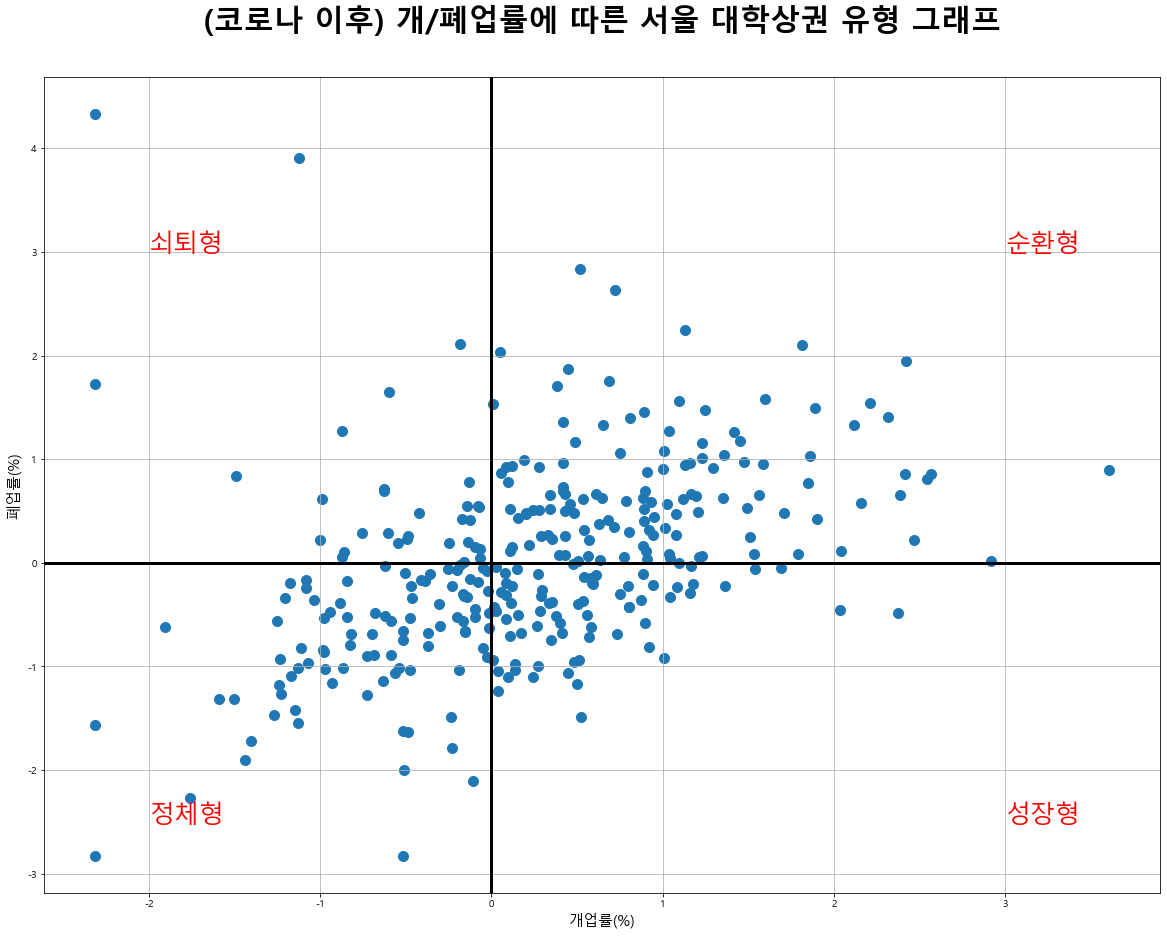

In [40]:
a = open_close_ratio("대학상권", None)

##### 서울시 확인

In [15]:
store_cnt = store_inf.groupby('년-분기')['점포_수'].sum()           # 분기별 대학상권 점포수
openstore_cnt = store_inf.groupby('년-분기')['개업_점포_수'].sum()  # 분기별 대학상권 개업 점포 수
closestore_cnt = store_inf.groupby('년-분기')['폐업_점포_수'].sum() # 분기별 대학상권 폐업 점포 수
openstore_ratio_byquan = openstore_cnt / store_cnt * 100   # 분기별 대학상권 개업률
closestore_ratio_byquan = closestore_cnt / store_cnt * 100 # 분기별 대학상권 폐업률

## 코로나 후 이후 비교를 위해 (2020-2분기 이후) 평균을 구함
open_point_aftercovid = np.round(openstore_ratio_byquan.iloc[-5:].mean(), 3)  
close_point_aftercovid = np.round(closestore_ratio_byquan.iloc[-5:].mean(), 3)

display('서울상권의 (코로나 이후) 평균 개업률 : {}'.format(open_point_aftercovid))
display('서울상권의 (코로나 이후) 평균 폐업률 : {}'.format(close_point_aftercovid))

'서울상권의 (코로나 이후) 평균 개업률 : 2.357'

'서울상권의 (코로나 이후) 평균 폐업률 : 2.643'